In [84]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

#Load test file to see what's inside the files:
file = uproot.open("ev{}.root".format(1))
tree = file["nndumper"]["evttree"] 
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
TPCImgDataU          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
TPCImgWidthU         | int32_t                  | AsDtype('>i4')
TPCImgHeightU        | int32_t                  | AsDtype('>i4')
TPCImgDataV          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
TPCImgWidthV         | int32_t                  | AsDtype('>i4')
TPCImgHeightV        | int32_t                  | AsDtype('>i4')
TPCImgDataY          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
TPCImgWidthY         | int32_t                  | AsDtype('>i4')
TPCImgHeightY        | int32_t                  | AsDtype('>i4')


In [96]:
#On true useful files, use lazy arrays instead -> Memory isn't infinite!

lazyarray = uproot.lazy("ev{}.root".format(1)+":nndumper/evttree")
NEvents=len(lazyarray)
print("Numero de eventos en el .root file: ",NEvents)

Numero de eventos en el .root file:  1


In [97]:
w=lazyarray[0]["TPCImgWidthU"]
h=lazyarray[0]["TPCImgHeightU"]

print(w,h)


1984 6800


<Figure size 432x288 with 0 Axes>

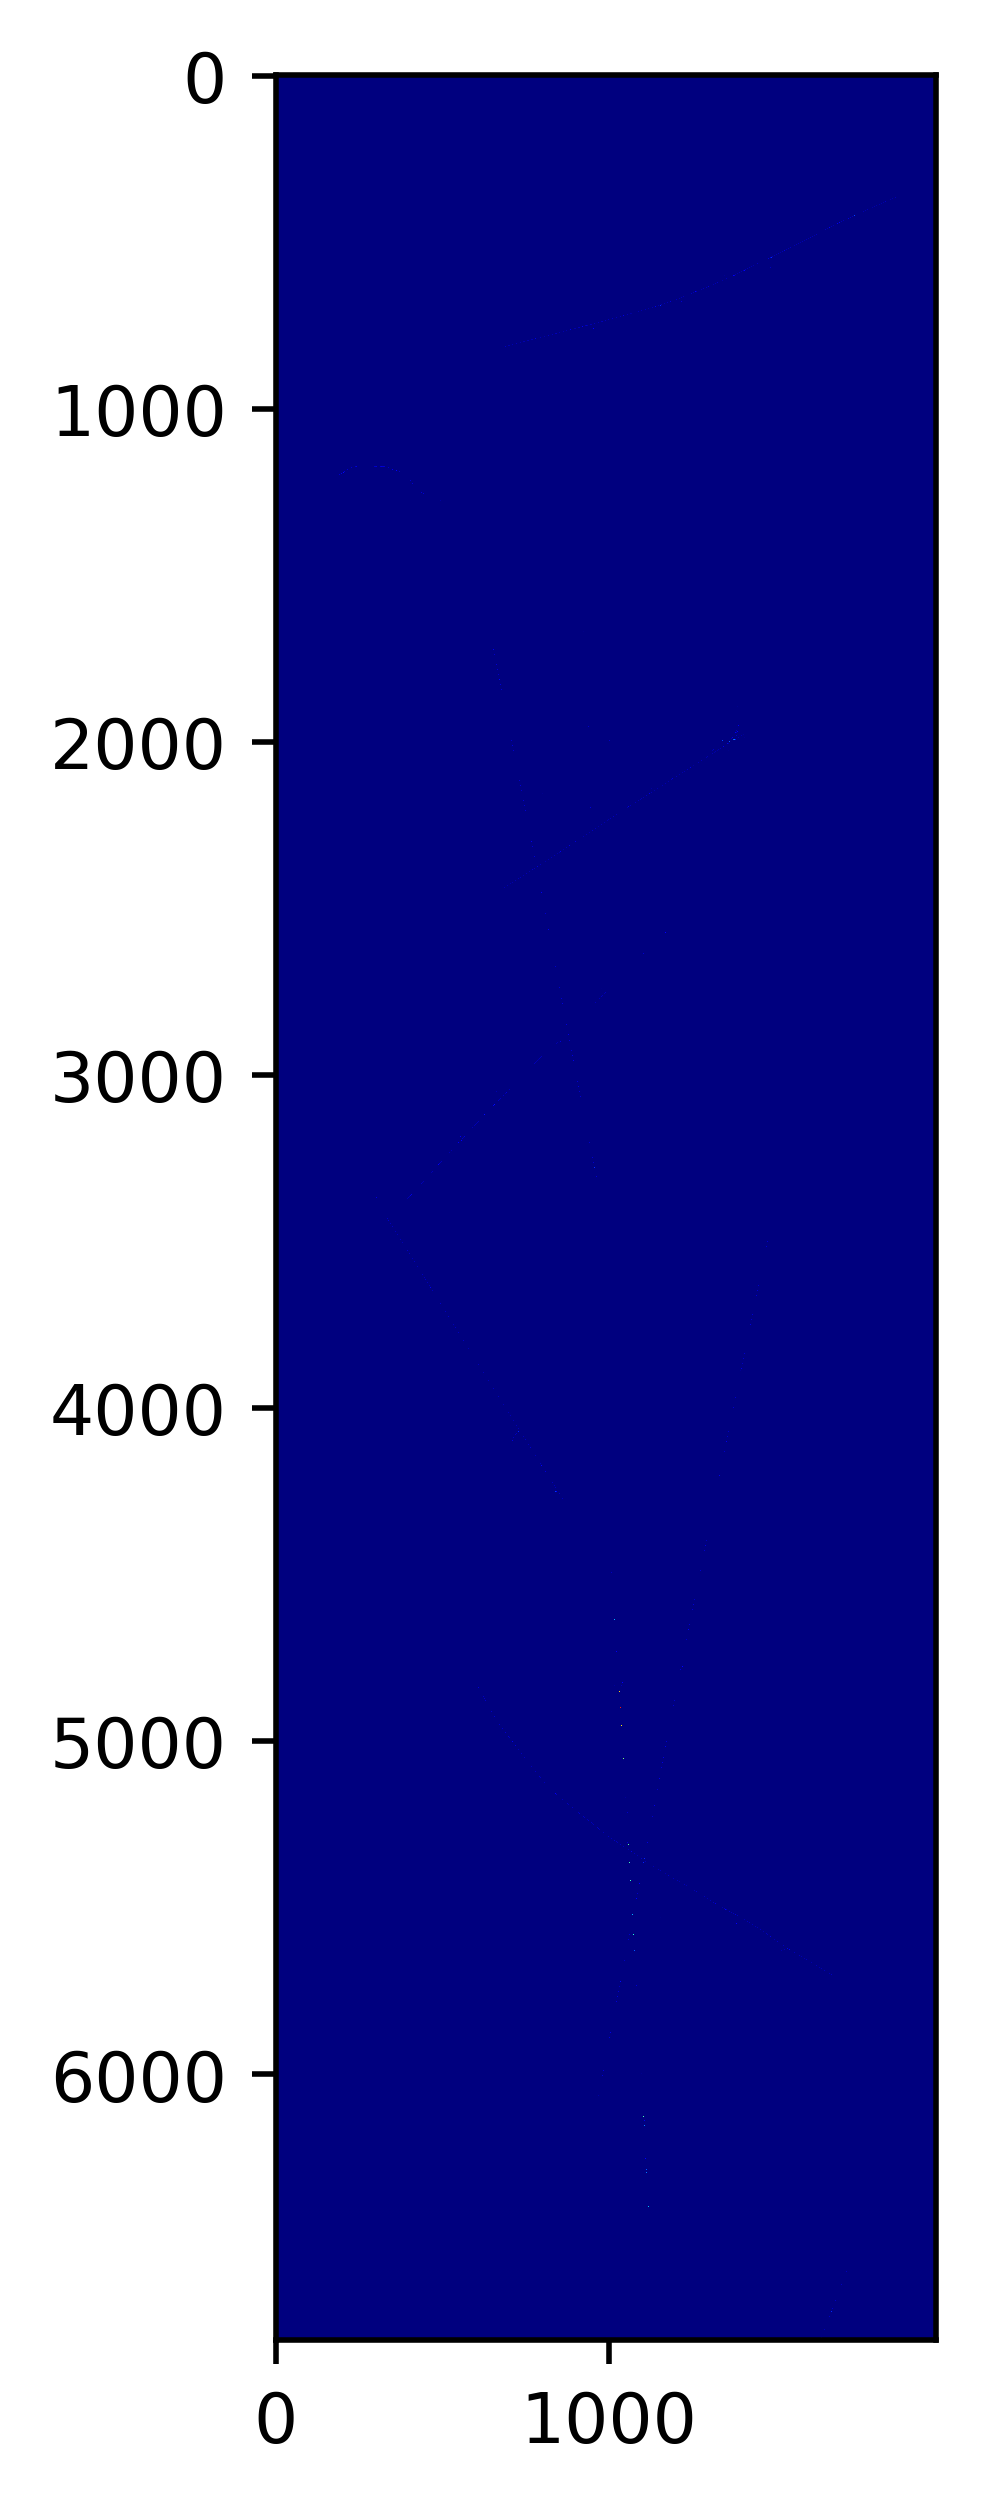

In [123]:
#Loop over the events in the run
# for i in range(NEvents):
for i in range(1):
    picture_root = lazyarray[i]["TPCImgDataU"]
    picture_nump =picture_root.to_numpy()

    fig = plt.figure()

    picture_matr =np.reshape(picture_nump,(h,w))
    
    #Funciona!
    plt.figure(figsize=(8, 6), dpi=500)
    plt.imshow(picture_matr,cmap = 'jet', interpolation='none')

    plt.show()


In [94]:
picture_matr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)